### Demonstrating Convergence of Black Scholes and Binomial Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from BinomialPricingModelScript import BinomialPricingModel
from py_vollib.black_scholes import black_scholes as bs 

In [4]:
stock_price = 100
strike_price = 100
days_to_expiry = [30, 90, 180, 360]
interest_rate = 0.06
time_steps = [i for i in range(10, 500, 10)]
volatility = 0.1

In [5]:
# Dictionary to store results
results = {days: [] for days in days_to_expiry}
bs_results = {days: [] for days in days_to_expiry}

# Loop through each step in time_steps, create an instance, and call the method
for days in days_to_expiry:
    binomial_prices = []
    for steps in time_steps:
        # create an instance of the class
        model = BinomialPricingModel(stock_price, strike_price, days, steps, interest_rate, volatility)
        # call the method
        european_price = model.european_option()
        binomial_prices.append(european_price)
    results[days] = binomial_prices
    # Calculate BS model prices
    bs_prices = [bs('c', stock_price, strike_price, days/365, interest_rate, volatility) for _ in time_steps]
    bs_results[days] = bs_prices

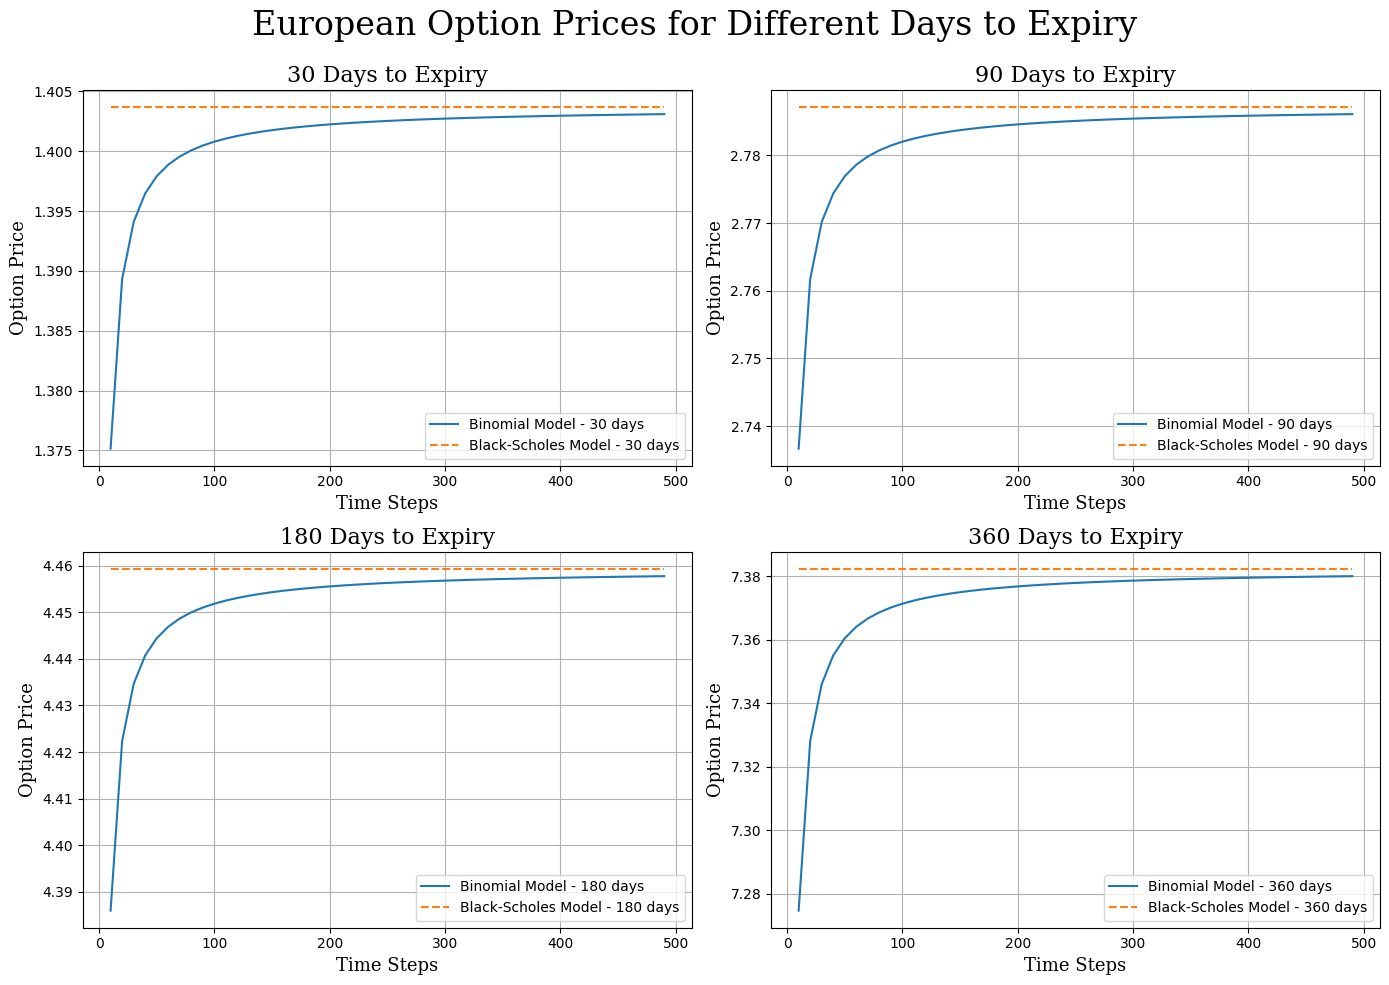

In [7]:

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('European Option Prices for Different Days to Expiry', fontname='serif', fontsize=24)

for idx, days in enumerate(days_to_expiry):
    ax = axs[idx // 2, idx % 2]
    ax.plot(time_steps, results[days], label=f'Binomial Model - {days} days')
    ax.plot(time_steps, bs_results[days], label=f'Black-Scholes Model - {days} days', linestyle='--')
    ax.set_title(f'{days} Days to Expiry', fontname='serif', fontsize=16)
    ax.set_xlabel('Time Steps', fontname='serif', fontsize=13)
    ax.set_ylabel('Option Price', fontname='serif', fontsize=13)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()